## Examples of Eigendecomposition

This notebook contains some simple examples of eigendecomposition. 

### Example for simple 2x2 matrix

In [27]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline

A = np.array([[1,3], [3, 1]])
A

array([[1, 3],
       [3, 1]])

In [28]:
eigs, Q = np.linalg.eig(A)
print(np.diag(eigs))
print(Q)

[[ 4.  0.]
 [ 0. -2.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [45]:
# Reconstruct the original matrix
np.dot(Q, np.dot(np.diag(eigs), np.transpose(Q)))

array([[1., 3.],
       [3., 1.]])

In [43]:
## Q is unitary
np.linalg.norm(Q, axis=0)

array([1., 1.])

In [44]:
# Q is unitary
np.linalg.norm(Q, axis=1)

array([1., 1.])

In [57]:
# Eigenvectors are orthogonal
np.dot(Q[0,:],Q[1,:])

0.0

In [59]:
# Eigenvectors are orthogonal
np.dot(Q[:,0],Q[:,1])

0.0

In [41]:
Q_inv = np.linalg.inv(Q)
print(Q_inv)
print(np.dot(Q, Q_inv))

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


In [42]:
# For real Q transpose = inverse  
np.dot(Q, np.transpose(Q))

array([[1., 0.],
       [0., 1.]])

In [30]:
Cond_num = abs(eigs[0]/eigs[1])
Cond_num

1.999999999999999

## Finding an inverse with eigenvalues  

In [47]:
inverse_eigs = np.diag(1.0/eigs)
inverse_eigs

array([[ 0.25,  0.  ],
       [ 0.  , -0.5 ]])

In [48]:
A_inv = np.dot(Q, np.dot(inverse_eigs, np.transpose(Q)))
A_inv

array([[-0.125,  0.375],
       [ 0.375, -0.125]])

In [50]:
# Verify the result
np.dot(A_inv, A)

array([[1.00000000e+00, 1.11022302e-16],
       [4.44089210e-16, 1.00000000e+00]])

### Eigenvalues and Rank

In [38]:
B = np.array([[3,-3,6],
            [2,-2,4],
            [1, -1, 2]])
print(B)

[[ 3 -3  6]
 [ 2 -2  4]
 [ 1 -1  2]]


In [39]:
B_eigs, B_Q = np.linalg.eig(B)
print(B_eigs)
print(B_Q)

[ 3.00000000e+00  5.23364153e-16 -6.00567308e-17]
[[ 8.01783726e-01  1.03168406e-16 -8.26172899e-01]
 [ 5.34522484e-01 -8.94427191e-01  2.15213587e-01]
 [ 2.67261242e-01 -4.47213595e-01  5.20693243e-01]]


In [40]:
Cond_num = abs(B_eigs[0]/B_eigs[2])
Cond_num

4.995276899149314e+16

### Example with Data

Text(0.5, 1.0, 'Sample data')

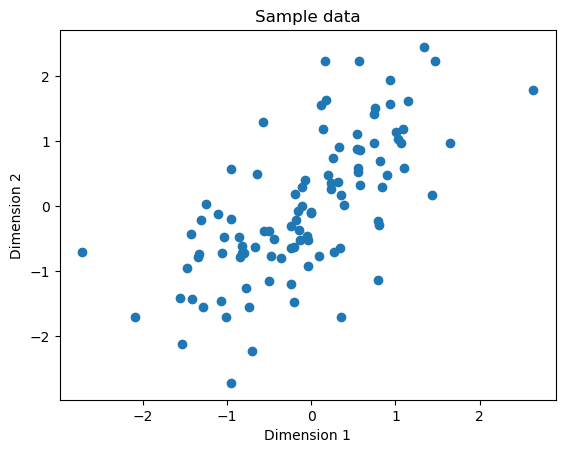

In [10]:
nr.seed(124)
cov = np.array([[1.0, 0.6], [0.6, 1.0]])
mean = np.array([0.0, 0.0])

sample = nr.multivariate_normal(mean, cov, 100)

plt.scatter(sample[:,0], sample[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Sample data')

In [11]:
cov_sample = np.matmul(np.transpose(sample), sample)
cov_sample

array([[ 81.00983399,  65.72792108],
       [ 65.72792108, 116.62580573]])

In [12]:
sample_eigs, sample_Q = np.linalg.eig(cov_sample)
print(sample_eigs)
print(sample_Q)

[ 30.72021366 166.91542606]
[[-0.79419984 -0.60765665]
 [ 0.60765665 -0.79419984]]


Text(0.5, 1.0, 'Sample data')

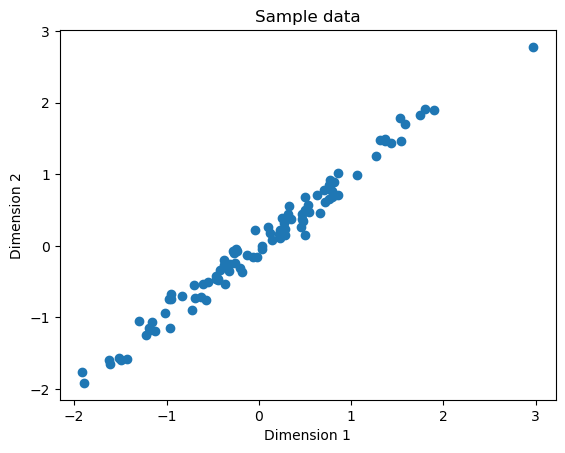

In [54]:
## Example with more extreme covariance
nr.seed(1233)
cov = np.array([[1.0, 0.99], [0.99, 1.0]])
mean = np.array([0.0, 0.0])

sample_2 = nr.multivariate_normal(mean, cov, 100)

plt.scatter(sample_2[:,0], sample_2[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Sample data')

In [55]:
cov_sample_2 = np.matmul(np.transpose(sample_2), sample_2)
cov_sample_2

array([[85.57316277, 84.98432934],
       [84.98432934, 86.03627199]])

In [56]:
sample_2_eigs, sample_2_Q = np.linalg.eig(cov_sample_2)
print(sample_2_eigs)
print(sample_2_Q)

[  0.82007258 170.78936217]
[[-0.70806944 -0.70614281]
 [ 0.70614281 -0.70806944]]


In [62]:
# Verify the eigenvectors are orthogonal  
print('Dot product of columns = ' + str(np.dot(sample_2_Q[:,0],sample_2_Q[:,1])))
print('Dot product of rows = ' + str(np.dot(sample_2_Q[0,:],sample_2_Q[1,:])))

Dot product of columns = 0.0
Dot product of rows = 0.0
